In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense , Dropout,Activation ,Flatten,Conv2D,MaxPool2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import random
import os

In [2]:
Directory='/home/mjs/Downloads/datasets/asl-alphabet-test'
Name=[name for name in os.listdir('/home/mjs/Downloads/datasets/asl-alphabet-test/')]
Image_size=50

training_data=[]
for name in Name:
        path=os.path.join(Directory,name) 
        class_num=Name.index(name)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(Image_size,Image_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
x=[]
y=[]
random.shuffle(training_data)
for pic,name in training_data:
    x.append(pic)
    y.append(name)
    
    
x=np.array(x).reshape(-1,Image_size,Image_size,1)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

x_train=x_train/[[265]]
x_test=x_test/[[265]]

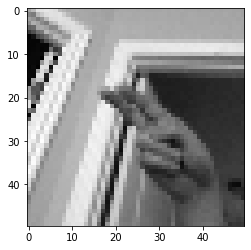

In [9]:
plt.imshow(x_train[0,:,:,0],cmap='gray')

In [10]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=x.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(30,activation='softmax'))

model.compile(loss="mean_absolute_error",optimizer="adam",metrics=["accuracy"])

model.fit(x_train,y_train,epochs=10)

Train on 696 samples
Epoch 1/10
696/696 [==============================] - 1s 2ms/sample - loss: 14.0224 - accuracy: 0.9986
Epoch 2/10
696/696 [==============================] - 1s 971us/sample - loss: 14.0224 - accuracy: 0.9986
Epoch 3/10
696/696 [==============================] - 1s 974us/sample - loss: 14.0224 - accuracy: 0.9986
Epoch 4/10
696/696 [==============================] - 1s 979us/sample - loss: 14.0224 - accuracy: 0.9986
Epoch 5/10
696/696 [==============================] - 1s 979us/sample - loss: 14.0224 - accuracy: 0.9986
Epoch 6/10
696/696 [==============================] - 1s 974us/sample - loss: 14.0224 - accuracy: 0.9986
Epoch 7/10
696/696 [==============================] - 1s 977us/sample - loss: 14.0224 - accuracy: 0.9986
Epoch 8/10
696/696 [==============================] - 1s 983us/sample - loss: 14.0224 - accuracy: 0.9986
Epoch 9/10
696/696 [==============================] - 1s 993us/sample - loss: 14.0224 - accuracy: 0.9986
Epoch 10/10
696/696 [===============

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                123936    
_________________________________________________________________
dense_3 (Dense)              (None, 30)               

In [12]:
model.evaluate(x_test,y_test)

174/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[14.789655422342234, 1.0]